In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [2]:
df=pd.read_json("D:/projects/sentiment_analysis/data.json", lines=True)

In [3]:
df.head(20)

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,1881509818,"[0, 0]",5,This came in on time and I am veru happy with ...,"01 26, 2014",AIXZKN4ACSKI,David Briner,Woks very good,1390694400
1,1881509818,"[1, 1]",5,I had a factory Glock tool that I was using fo...,"02 2, 2012",A1L5P841VIO02V,Jason A. Kramer,Works as well as the factory tool,1328140800
2,1881509818,"[2, 2]",4,If you don't have a 3/32 punch or would like t...,"02 28, 2012",AB2W04NI4OEAD,J. Fernald,"It's a punch, that's all.",1330387200
3,1881509818,"[0, 0]",4,This works no better than any 3/32 punch you w...,"02 5, 2012",A148SVSWKTJKU6,"Jusitn A. Watts ""Maverick9614""",It's a punch with a Glock logo.,1328400000
4,1881509818,"[0, 0]",4,I purchased this thinking maybe I need a speci...,"04 23, 2013",AAAWJ6LW9WMOO,Material Man,"Ok,tool does what a regular punch does.",1366675200
5,1881509818,"[0, 0]",5,"Needed this tool to really break down my G22, ...","11 2, 2012",A2XX2A4OJCDNLZ,RatherLiveInKeyWest,Glock punch tool - needed for your Glock and o...,1351814400
6,1881509818,"[0, 0]",5,If u don't have it .. Get it. All you need to ...,"06 10, 2014",A283UOBQRUNM4Q,Thomas Dragon,Great tool,1402358400
7,2094869245,"[0, 0]",4,This light will no doubt capture the attention...,"08 31, 2013",AWG3H90WVZ0Z1,Alec Nelson,Bright!,1377907200
8,2094869245,"[0, 1]",5,"Light and laser torch work well, very bright. ...","05 27, 2013",A3V52OTJHKIJZX,"A. Saenz Jr. ""Bettering self""",Be seen,1369612800
9,2094869245,"[0, 0]",5,Does everything it says it will do. I would li...,"11 2, 2013",A3SZBE5F3UQ9EC,"ChasRat ""ChasRat""",Bicycle rear tail light,1383350400


In [4]:
#checking the words number
print('Dataset size: {:} words'.format(len(df)))

Dataset size: 296337 words


In [5]:
df.columns

Index(['asin', 'helpful', 'overall', 'reviewText', 'reviewTime', 'reviewerID',
       'reviewerName', 'summary', 'unixReviewTime'],
      dtype='object')

In [6]:
#rearranging in a sequence with word type cols together
df=df[['asin', 'summary', 'reviewText', 'overall', 'reviewerID', 'reviewerName', 'helpful', 'reviewTime',
      'unixReviewTime']]

In [7]:
#use to_datetime function of pandas to change reviewtime col into processable form
df["reviewTime"] = pd.to_datetime(df["reviewTime"])

In [8]:
df.head()

,asin,summary,reviewText,overall,reviewerID,reviewerName,helpful,reviewTime,unixReviewTime
0,1881509818,Woks very good,This came in on time and I am veru happy with ...,5,AIXZKN4ACSKI,David Briner,"[0, 0]",2014-01-26,1390694400
1,1881509818,Works as well as the factory tool,I had a factory Glock tool that I was using fo...,5,A1L5P841VIO02V,Jason A. Kramer,"[1, 1]",2012-02-02,1328140800
2,1881509818,"It's a punch, that's all.",If you don't have a 3/32 punch or would like t...,4,AB2W04NI4OEAD,J. Fernald,"[2, 2]",2012-02-28,1330387200
3,1881509818,It's a punch with a Glock logo.,This works no better than any 3/32 punch you w...,4,A148SVSWKTJKU6,"Jusitn A. Watts ""Maverick9614""","[0, 0]",2012-02-05,1328400000
4,1881509818,"Ok,tool does what a regular punch does.",I purchased this thinking maybe I need a speci...,4,AAAWJ6LW9WMOO,Material Man,"[0, 0]",2013-04-23,1366675200


In [9]:
#grouping to find number of products
#overall==reviews

products=df['asin'].groupby(df['asin']).count()
products

asin
1881509818      7
2094869245     12
7245456259      7
7245456313    106
B000002NUS     17
B00000ELZ5      5
B00000IURU      6
B00000IUX5      5
B00000J6JO     21
B0000224UE     14
B00002ND6V      6
B000030056      9
B00003CYPK      7
B00004NKIQ      5
B00004S9I0      5
B00004SAKY      5
B00004SQM7     13
B00004SQM9    125
B00004T1JH      6
B00004T1JW     10
B00004T69F      6
B00004THDC     10
B00004TQ2P      6
B00004TXM7      8
B00004U9J9      9
B00004WA4L      5
B00004WA4T      9
B00004WA4U     12
B00004WA57     11
B00004WFSY      7
             ... 
B00JNV6CEK     15
B00JOT9T1E      5
B00JQDFSGS      6
B00JR61GQU      5
B00JU7F3KG      8
B00JVUXQW4      7
B00JX96CQA     31
B00JXI2QD4     27
B00K311KBO     10
B00K3DRJD0      7
B00K5T4NHC      8
B00K8J1JL2     18
B00KBQ5YL8     11
B00KCPUHQU      5
B00KEXR5IS     35
B00KGCLROK      5
B00KHJ93NE     22
B00KQG9K18      8
B00KS73CPU     10
B00KWR4CIM      9
B00KWXBZPE      8
B00KYC0DQU     11
B00KYIECY8     10
B00KYJI7TS     11
B00L1

In [10]:
#interested in top 10 reviewed products

sorted_products=products.sort_values(ascending=False)
sorted_products.head(10)

asin
B001HBHNHE    1042
B001T7QJ9O     763
B000S5ODN2     647
B0010O748Q     513
B0000C50K3     427
B002ZYRV2E     401
B002OKWHVO     398
B000GCRWCG     393
B001HBHNHY     372
B0035L35A8     359
Name: asin, dtype: int64

In [11]:
#checking the least reviewed product count
print(products.min())

5


In [12]:
#count of most common review
products.mode()

0    5
dtype: int64

In [13]:
df['reviewText']

0         This came in on time and I am veru happy with ...
1         I had a factory Glock tool that I was using fo...
2         If you don't have a 3/32 punch or would like t...
3         This works no better than any 3/32 punch you w...
4         I purchased this thinking maybe I need a speci...
5         Needed this tool to really break down my G22, ...
6         If u don't have it .. Get it. All you need to ...
7         This light will no doubt capture the attention...
8         Light and laser torch work well, very bright. ...
9         Does everything it says it will do. I would li...
10        Very bright.  I would recommend this lite to a...
11        It's cheaply made but does what it is supposed...
12        Mine arrived with only one of the lane-generat...
13        It works great its just a little bulky... I fe...
14        I love this light! I have two of these! It is ...
15        Bit bulky. One button is sticky. Works for now...
16        it is bright and it has multip

In [14]:
df1=df['reviewText']

In [19]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hardik.goel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hardik.goel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hardik.goel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:
#processing on stopwords and creating lemmas
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
stops=stopwords.words('english')

In [21]:
#generated english language stopword list
stops

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [22]:
import string
def tokenize(text):
    tokenized = word_tokenize(text)
    no_punc = []
    for review in tokenized:
        line = "".join(char for char in review if char not in string.punctuation)
        no_punc.append(line)
    tokens= stemmer(no_punc)
    lem_tokens = lemmatize(tokens)
    return lem_tokens

In [23]:
from nltk.stem import PorterStemmer
def stemmer(tokens):
    ps = PorterStemmer()
    stem_var=[ps.stem(p) for p in tokens]
    return stem_var

In [24]:
def lemmatize(tokens):
    lmtzr = WordNetLemmatizer()
    lemma = [lmtzr.lemmatize(t) for t in tokens]
    return lemma

In [28]:
# df1=df1.apply(lambda x:tokenize(x))
df=df.apply(lambda x: tokenize(x))

In [29]:
#checking how does the actual column without list conversion looks like now
df.reviewText

0         This came in on time and I am veru happy with ...
1         I had a factory Glock tool that I was using fo...
2         If you don't have a 3/32 punch or would like t...
3         This works no better than any 3/32 punch you w...
4         I purchased this thinking maybe I need a speci...
5         Needed this tool to really break down my G22, ...
6         If u don't have it .. Get it. All you need to ...
7         This light will no doubt capture the attention...
8         Light and laser torch work well, very bright. ...
9         Does everything it says it will do. I would li...
10        Very bright.  I would recommend this lite to a...
11        It's cheaply made but does what it is supposed...
12        Mine arrived with only one of the lane-generat...
13        It works great its just a little bulky... I fe...
14        I love this light! I have two of these! It is ...
15        Bit bulky. One button is sticky. Works for now...
16        it is bright and it has multip

In [30]:
# generate and see the type of word cloud being formed here along with the frequency of the most used word
from wordcloud import WordCloud
from wordcloud import wordcloud
cloud = wordcloud.WordCloud(background_color='white', max_font_size=60,relative_scaling=1).generate(' '.join(df.reviewText))

In [31]:
type(cloud)

wordcloud.wordcloud.WordCloud

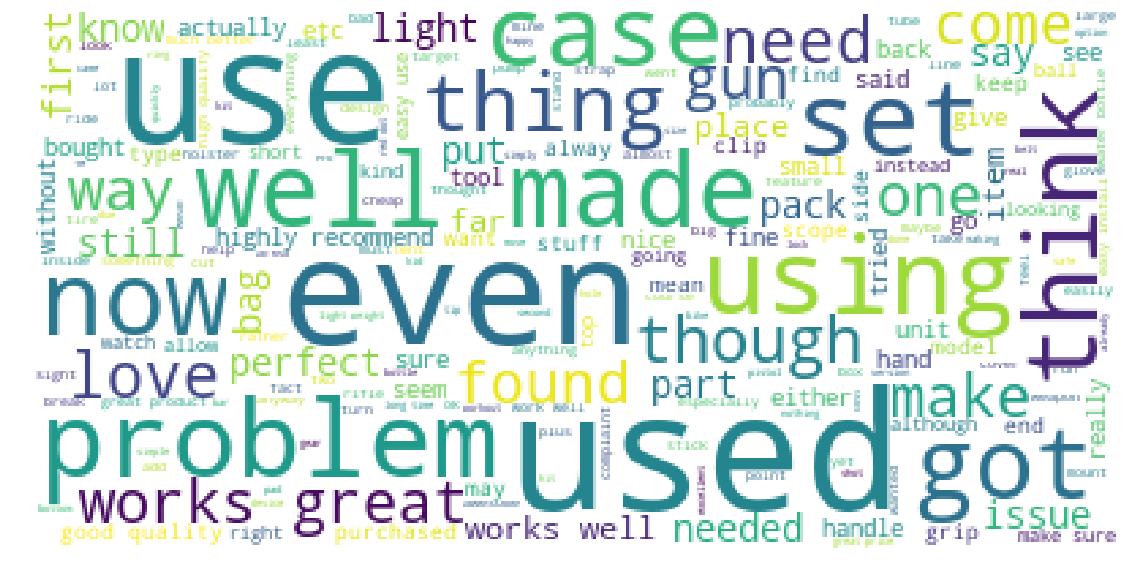

In [32]:
fig = plt.figure(figsize=(20, 10))
plt.axis('off')
plt.imshow(cloud);

## Sentiment modelling now using pos_neg column
    Negative reviews:      1-3 Stars  = 0
    Positive reviews:      4-5 Stars  = 1

In [33]:
df['pos_neg']=[1 if x>3 else 0 for x in df.overall]

In [34]:
df.tail(5)

,asin,summary,reviewText,overall,reviewerID,reviewerName,helpful,reviewTime,unixReviewTime,pos_neg
296332,B00LFPS0CY,Hydracentials Sporty 25 Oz Stainless Steel Wat...,This is a water bottle done right. It is a ver...,5,A2XX2A4OJCDNLZ,RatherLiveInKeyWest,"[2, 3]",2014-07-11,1405036800,1
296333,B00LFPS0CY,"Large, incredibly well made water bottle!",If you're looking for an insulated water bottl...,5,A3LGT6UZL99IW1,"Richard C. Drew ""Anaal Nathra/Uthe vas Bethod...","[0, 0]",2014-07-18,1405641600,1
296334,B00LFPS0CY,"""Great Water Bottle For Hot Day""......","This Hydracentials Sporty 25 OZ, double insula...",5,ASKZO80Z1RKTR,Robin Lee,"[0, 0]",2014-07-21,1405900800,1
296335,B00LFPS0CY,A pretty impressive water bottle. Best I've s...,As usual I received this item free in exchange...,5,APRNS6DB68LLV,"Rob Slaven ""slavenrm@gmail. com""","[1, 1]",2014-07-21,1405900800,1
296336,B00LFPS0CY,"""Cool"" Bottle!",Hydracentials insulated 25 oz water bottle.Thi...,5,A3UJRNI8UR4871,"Wulfstan ""wulfstan""","[2, 2]",2014-07-15,1405382400,1


In [35]:
#fetching locations of all those pos_negatives as 0 where review is negative
df.loc[df['overall'] < 4, 'pos_neg']

11        0
19        0
31        0
39        0
42        0
49        0
50        0
57        0
75        0
95        0
129       0
132       0
135       0
136       0
139       0
145       0
165       0
166       0
167       0
168       0
170       0
171       0
175       0
176       0
178       0
179       0
180       0
187       0
208       0
214       0
         ..
295788    0
295789    0
295791    0
295793    0
295794    0
295797    0
295798    0
295799    0
295804    0
295807    0
295808    0
295812    0
295842    0
295852    0
295853    0
295878    0
295888    0
295891    0
295897    0
295914    0
295916    0
295923    0
295945    0
295992    0
295996    0
296036    0
296043    0
296047    0
296050    0
296156    0
Name: pos_neg, Length: 43320, dtype: int64

In [36]:
#SERIES
review_text = df["reviewText"]

In [37]:
#Doing train and test split with no random seed
x_train, x_test, y_train, y_test = train_test_split(df.reviewText, df.pos_neg, random_state=0)
print("x_train shape: {}".format(x_train.shape), end='\n')
print("y_train shape: {}".format(y_train.shape), end='\n\n')
print("x_test shape: {}".format(x_test.shape), end='\n')
print("y_test shape: {}".format(y_test.shape), end='\n\n')

x_train shape: (222252,)
y_train shape: (222252,)

x_test shape: (74085,)
y_test shape: (74085,)



In [38]:
#applying logistic regression which is countVectorizer
#min_df ( = 5): defines the minimum frequency of a word for it to be counted as a feature
#ngram- tells the min and max length of sequence of tokens to be considered together---e.g but the, wise man, etc. 
#one gram- unigram, two gram, etc.
#my name, name is, is hardik, hardik goel
# in bigram 2: 1 mapping for key value pair---- i.e. to predict one word if using 2 words then bigram
# choose based on best accuracy among unigram,bigram, etc.
#This fit is not actual train
#  columns	 My, name, is, Hardik, Goel, Aakash, Aggarwal
#  pos_neg
#  1,1,1,1,1,0,0	
#  1,1,1,0,0,1,1	
# countVectorizer- only counts word frequencies whereas tf idf(term frequency inverse document frequency) also takes 
# into consideration most frequently used word(most weighted word) using decimal values
#repr is like string to create unambigous values- used for debug whereas str is used for readability


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# Vectorize X_train
vectorizer = CountVectorizer(min_df=5,ngram_range=(2, 2)).fit(x_train)
X_train = vectorizer.transform(x_train)
print("X_train:\n{}".format(repr(X_train)))

X_train:
<222252x328887 sparse matrix of type '<class 'numpy.int64'>'
	with 14386310 stored elements in Compressed Sparse Row format>


In [39]:
print("Vocabulary size: {}".format(len(vectorizer.vocabulary_)))
feature_names = vectorizer.get_feature_names()
print("Number of features: {}".format(len(feature_names)))

Vocabulary size: 328887
Number of features: 328887


In [40]:
#Displaying all the dictionary's words and their frequencies as present in this
vectorizer.get_feature_names()

['00 34',
 '00 am',
 '00 and',
 '00 as',
 '00 at',
 '00 buck',
 '00 bucks',
 '00 buckshot',
 '00 but',
 '00 can',
 '00 cheaper',
 '00 dollar',
 '00 dollars',
 '00 don',
 '00 each',
 '00 even',
 '00 for',
 '00 from',
 '00 great',
 '00 have',
 '00 here',
 '00 if',
 '00 in',
 '00 including',
 '00 is',
 '00 it',
 '00 its',
 '00 just',
 '00 knife',
 '00 less',
 '00 more',
 '00 on',
 '00 one',
 '00 or',
 '00 paid',
 '00 per',
 '00 plus',
 '00 pm',
 '00 position',
 '00 price',
 '00 range',
 '00 scope',
 '00 shipping',
 '00 since',
 '00 so',
 '00 that',
 '00 the',
 '00 then',
 '00 they',
 '00 this',
 '00 to',
 '00 very',
 '00 was',
 '00 what',
 '00 when',
 '00 which',
 '00 with',
 '00 worth',
 '00 would',
 '00 you',
 '000 00',
 '000 000',
 '000 and',
 '000 bbs',
 '000 btu',
 '000 feet',
 '000 for',
 '000 fps',
 '000 ft',
 '000 gallons',
 '000 hours',
 '000 mile',
 '000 miles',
 '000 of',
 '000 on',
 '000 or',
 '000 rds',
 '000 round',
 '000 rounds',
 '000 scope',
 '000 steel',
 '000 step',
 '0

In [41]:
from sklearn.linear_model import LogisticRegression
#doing 5 fold cross validation
scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)

C:\Users\hardik.goel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [42]:
print("CV accuracy: {}".format(np.mean(scores)))

CV accuracy: 0.8997669347616979


In [43]:
#using an okayish regularization
logreg = LogisticRegression(C=0.1).fit(X_train, y_train)

X_test = vectorizer.transform(x_test)

log_y_pred = logreg.predict(X_test)

In [44]:
logreg_score = accuracy_score(y_test, log_y_pred)
print("Accuracy:   {}".format(logreg_score))

Accuracy:   0.9018559762435041


In [45]:
print("Training set score: {}".format(logreg.score(X_train, y_train)))
print("Test set score: {}".format(logreg.score(X_test, y_test)))

Training set score: 0.9542726274679193
Test set score: 0.9018559762435041


In [46]:
log_cfm = confusion_matrix(y_test, log_y_pred)
print("Confusion matrix:")
print(log_cfm, end='\n\n')
print('-'*15)
print(np.array([['TN', 'FP'],[ 'FN' , 'TP']]))

Confusion matrix:
[[ 5258  5676]
 [ 1595 61556]]

---------------
[['TN' 'FP']
 ['FN' 'TP']]


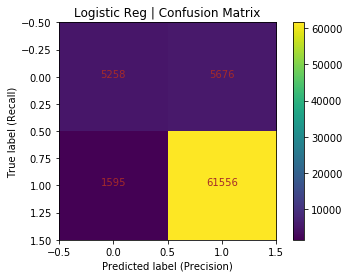

In [47]:
import itertools
plt.imshow(log_cfm, interpolation='nearest')
for i, j in itertools.product(range(log_cfm.shape[0]), range(log_cfm.shape[1])):
    plt.text(j, i, log_cfm[i, j],
             horizontalalignment="center",
             color="brown")

plt.ylabel('True label (Recall)')
plt.xlabel('Predicted label (Precision)')
plt.title('Logistic Reg | Confusion Matrix')
plt.colorbar();

In [48]:
log_f1 = f1_score(y_test, log_y_pred)
print("Logistic Reg - F1 score: {}".format(log_f1))

Logistic Reg - F1 score: 0.9442335273770354


In [49]:
# Defining a grid of parameters that we would want to test out in the model and select the best model using GridSearchCV
# for the above mentioned hyperparameters.
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)

C:\Users\hardik.goel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hardik.goel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [50]:
print("Best cross-validation score: {}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.901836653888379
Best parameters:  {'C': 0.1}


In [51]:
#doing scoring on test data
print("{}".format(grid.score(X_test, y_test)))
grid_log_f1 = f1_score(y_test, log_y_pred)
print("Grid Logistic Reg - F1 score: {}".format(grid_log_f1))

0.9018559762435041
Grid Logistic Reg - F1 score: 0.9442335273770354


In [52]:
#creating confusion matrix
#changed from y_pred to log_y_pred
cnf_matrix = confusion_matrix(y_test, log_y_pred)

In [53]:
cnf_matrix

array([[ 5258,  5676],
       [ 1595, 61556]], dtype=int64)

In [54]:
#TF-IDF- Term frequency and inverse document frequency
from sklearn.pipeline import Pipeline, make_pipeline
pipeline = make_pipeline(TfidfVectorizer(min_df=5, norm=None),
                     LogisticRegression())

In [55]:
tfidf_param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}

In [56]:
tfidf_grid = GridSearchCV(pipeline, tfidf_param_grid, cv=5)

In [57]:
tfidf_grid.fit(x_train, y_train)

print("Best cross-validation score: {}".format(tfidf_grid.best_score_))
print("Best parameters: ", tfidf_grid.best_params_)

C:\Users\hardik.goel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hardik.goel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Best cross-validation score: 0.8915510321616903
Best parameters:  {'logisticregression__C': 0.001}


In [58]:
#Calculating accuracy on tf-idf using Logistic Regression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# Vectorize X_train
vectorizer_tf = CountVectorizer(min_df=5,ngram_range=(2, 2)).fit(x_train)
X_train_tf = vectorizer.transform(x_train)
print("X_train:\n{}".format(repr(X_train_tf)))

X_train:
<222252x328887 sparse matrix of type '<class 'numpy.int64'>'
	with 14386310 stored elements in Compressed Sparse Row format>


In [59]:
print("Vocabulary size: {}".format(len(vectorizer_tf.vocabulary_)))
feature_names_tf = vectorizer_tf.get_feature_names()
print("Number of features: {}".format(len(feature_names_tf)))

Vocabulary size: 328887
Number of features: 328887


In [60]:
scores_tf = cross_val_score(LogisticRegression(), X_train_tf, y_train, cv=5)

print("CV accuracy: {}".format(np.mean(scores_tf)))

C:\Users\hardik.goel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


CV accuracy: 0.8997669347616979


In [61]:
logreg_tf = LogisticRegression(C=0.1).fit(X_train_tf, y_train)

In [62]:
X_test_tf = vectorizer_tf.transform(x_test)

In [63]:
log_y_pred_tf = logreg_tf.predict(X_test_tf)

In [64]:
logreg_score_tf = accuracy_score(y_test, log_y_pred_tf)
print("Accuracy:   {}".format(logreg_score_tf))

Accuracy:   0.9018559762435041


In [65]:
#MNB on CountVectorizer
# Applying laplace smoothing parameter as 0.01

mnb = MultinomialNB(alpha=.01)
mnb.fit(X_train, y_train)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [66]:
mnb_y_pred = mnb.predict(X_test)
mnb_score = accuracy_score(y_test, mnb_y_pred)
print("Accuracy:   {}".format(mnb_score))

Accuracy:   0.8925828440305055


In [67]:
print("Training set score: {}".format(mnb.score(X_train, y_train)))
print("Test set score: {}".format(mnb.score(X_test, y_test)))

Training set score: 0.9612106977664993
Test set score: 0.8925828440305055


In [68]:
mnb_cfm = confusion_matrix(y_test, mnb_y_pred)
print("Confusion matrix:")
print(mnb_cfm, end='\n\n')
print('-'*15)
print(np.array([['TN', 'FP'],[ 'FN' , 'TP']]))

Confusion matrix:
[[ 5429  5505]
 [ 2453 60698]]

---------------
[['TN' 'FP']
 ['FN' 'TP']]


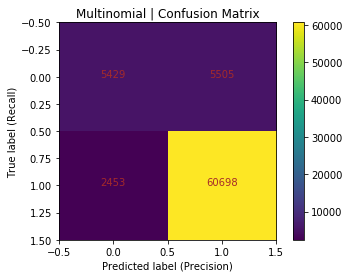

In [69]:
plt.imshow(mnb_cfm, interpolation='nearest')

for i, j in itertools.product(range(mnb_cfm.shape[0]), range(mnb_cfm.shape[1])):
    plt.text(j, i, mnb_cfm[i, j],
             horizontalalignment="center",
             color="brown")

plt.ylabel('True label (Recall)')
plt.xlabel('Predicted label (Precision)')
plt.title('Multinomial | Confusion Matrix')
plt.colorbar();

In [70]:
mnb_f1 = f1_score(y_test, mnb_y_pred)
print("Multinomial NB - F1 score: {}".format(mnb_f1))

Multinomial NB - F1 score: 0.9384789028557293


In [71]:
#TfidfVectorizer
# Vectorize X_train
mnb_tfidfvectorizer = TfidfVectorizer(min_df=5).fit(x_train)
mnb_X_train = mnb_tfidfvectorizer.transform(x_train)
print("X_train:\n{}".format(repr(mnb_X_train)))

X_train:
<222252x28733 sparse matrix of type '<class 'numpy.float64'>'
	with 12428692 stored elements in Compressed Sparse Row format>


In [72]:
mnb_X_test = mnb_tfidfvectorizer.transform(x_test)

In [73]:
mnb_score2 = accuracy_score(y_test, mnb_y_pred)
print("Accuracy:   {}".format(mnb_score2))

Accuracy:   0.8925828440305055


In [74]:
mnb_cfm2 = confusion_matrix(y_test, mnb_y_pred)
print("Confusion matrix:")
print(mnb_cfm2, end='\n\n')
print('-'*15)
print(np.array([['TN', 'FP'],[ 'FN' , 'TP']]))

Confusion matrix:
[[ 5429  5505]
 [ 2453 60698]]

---------------
[['TN' 'FP']
 ['FN' 'TP']]


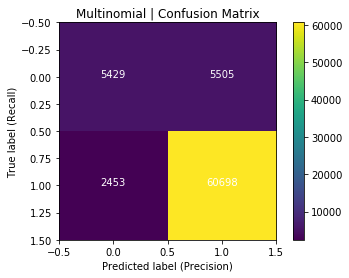

In [75]:
plt.imshow(mnb_cfm2, interpolation='nearest')

for i, j in itertools.product(range(mnb_cfm2.shape[0]), range(mnb_cfm2.shape[1])):
    plt.text(j, i, mnb_cfm2[i, j],
             horizontalalignment="center",
             color="white")

plt.ylabel('True label (Recall)')
plt.xlabel('Predicted label (Precision)')
plt.title('Multinomial | Confusion Matrix')
plt.colorbar();

In [76]:
mnb2_f1 = f1_score(y_test, mnb_y_pred)
print("Multinomial NB - F1 score: {:.3f}".format(mnb2_f1))

Multinomial NB - F1 score: 0.938


# Summary: Logistic Regression  gives the best result


# Accuracy:   0.9018559762435041

In [77]:
# s="Overall, I'd say that this is a fantastic knife. The other glowing reviews for the knife are absolutely correct in terms of its solid feel and sharpness. The lock is excellent, and the serrated edge is just about perfect. For the price, I don't know if you can do any better in terms of folding knives.But then the unexpected let down.I took it with me on a kayaking trip to an island off the coast of Florida. I had three knives with me, all of them Gerber knives of different types. All three were stainless steel blades, one being a PFD knife, and the other a full tang non-folding knife.Over the course of the trip out there, all three knives were exposed to significant amounts of salt water. Both of the other knives had made this trip before, so I didn't give it a second thought.  I guess I should have, because opening the knife the next day revealed a blade covered in rust spots. Of course, I cleaned it off as best I could when I brought it home, but there are still a couple dozen rust marks on the face of the blade that just won't come off.So I know that it's my fault for not washing off the blade immediately. I guess since the other two knives have had no problems, I just didn't think about it. With those knives I can just wash the dried salt residue off of them whenever I get around to it. And with a limited fresh water supply (whatever I can fit in my kayak along with the rest of the gear), I need to be careful with how much I use.I guess to me the question is if Gerber can make these two other knives impervious to salt water, then why not this one?Maybe there are others out there with better experiences in salty environments, and if anyone would like to mention those experiences, feel free to leave a comment with this review. I welcome dissenting opinions, but I can only review based on my own personal experiences. And overall I love the knife, but it had to lose points for rusting after one day."
# s1=["This came in on time a​am veru happy with","hi there","Hello is there anybody in there","bad words","hate shit fuck"]
# def my_predict(s, vect. mod):
#     tok1=pd.Series(s)
#     x_test_observe=vect.transform(tok1)
#     return mod.predict(x_test_observe)
# my_predict=lambda s, vect, mod: mod.predict(vect.transform(pd.Series(s)))
# my_predict(s,vectorizer, logreg)
# my_predict=lambda s, vect, mod: mod.predict(vect.transform(pd.Series(s1)))
# my_predict(s1,vectorizer, logreg)

In [78]:
s1=["This came in on time a​am veru happy with","hi there","Hello is there anybody in there","bad words","hate shit fuck"]
my_predict=lambda s, vect, mod: mod.predict(vect.transform(pd.Series(s1)))
my_predict(s1,vectorizer, logreg)

array([1, 1, 1, 1, 1], dtype=int64)

In [79]:
x_train[:10]

212436    This rucksack is very light, can hold quite a ...
96999     The sizing of the T-shirts are what you'd expe...
284041    Combine this with a sping, makes the LCP a rea...
128316    I've take this out twice on my Marlin 795, it ...
107020    Like other reviewers, the directions for insta...
121918    I love this freewheel.It shifts great, looks n...
448       Overall, I'd say that this is a fantastic knif...
61235     lightweight, drys fast, easy to pack. Make sur...
221237    To me this is a must if you are a hard user of...
211797    I made the mistake of really underestimating t...
Name: reviewText, dtype: object

In [80]:
y_train[:10]

212436    1
96999     1
284041    1
128316    1
107020    1
121918    1
448       0
61235     1
221237    1
211797    1
Name: pos_neg, dtype: int64

## Reading 100 cell phone reviews for scoring to see how our model performs

In [81]:
a= ["They look good and stick good! I just don't like the rounded shape because I was always bumping it and Siri kept popping up and it was irritating. I just won't buy a product like this again",
 "These stickers work like the review says they do. They stick on great and they stay on the phone. They are super stylish and I can share them with my sister. ",
 "These are awesome and make my phone look so stylish! I have only used one so far and have had it on for almost a year! CAN YOU BELIEVE THAT! ONE YEAR!! Great quality!",
 "Item arrived in great time and was in perfect condition. However",
 "awesome! stays on",
 "These make using the home button easy. My daughter and I both like them.  I would purchase them again. Well worth the price.",
 "Came just as described.. It doesn't come unstuck and its cute! People ask where I got them from & it's great when driving.",
 "it worked for the first week then it only charge my phone to 20%. it is a waste of money.",
 "Good case",
 "This is a fantastic case. Very stylish and protects my phone. Easy access to all buttons and features",
 "this case fits perfectly on the s4 and keeps me powerd all day I can't complain! a+ recommend it to all",
 "This is the first battery case I have had for my Galaxy S4. The S4 fits very well",
 "Performs exactly as advertised . It's very  sturdily built",
 "Unlike Most of the Rechargeable Battery cases",
 "Just what I needed. I needed a phone case for myself and my two sons",
 "When there is no outlets",
 "It works great. Doesn't heat up like crazy like the other ones I got",
 "Surprisingly",
 "I have tested this against the griffin dual output unit.I checked the charging current.This unit was charging my galaxy note battery with 70 ma.Griffin was charging with 40 ma! And the griffin was 4 times more expensive.I have not used these for very long. I bought 15 of them",
 "It worked great for the first couple of weeks then it just stopped completely.. so basically a small waste of money.",
 "I love that it has two ports for my phone and ipod. Who wants to be putting too many things in one socket.  Sleek and convenient to store and I just love it.",
 "just what you need",
 "does not have the need amps to charge things like ipads",
 "They are nothing special for sure",
 "I have several chargers. Have more than one vehicle so I keep more than one of these in each. Nothing more frustrating than finding all of a sudden one quits working",
 "I bought this a little skeptical. After I tried it I bought two more. It works great and so far it has lasted for about 3 months. If that changes I will update this review.",
 "I am disappointed that the 1A didn't work with my iPad.  That's what I get for buying a cheap adapter.",
 "This is a nice charger but you can tell it was made cheaply in China.  When it is charging the phone",
 "After a week only one side works",
 "Yo get exactly what you order in a timely fashion. And the item is just as described. Great buy if you ask me",
 "This is a terribly awesome product in my Subaru's console.  Passengers love it",
 "I've bough a munch of different things like this over the years. Most wouldn't stay in the jack",
 "Only works one side at a time. When you connect two cables",
 "it works great i like i can charge two thing at the same now i dont have to wait for my to finish charging her phone",
 "It came at last",
 "Didn't last very long. Worked great when it worked but it is a cheap piece of plastic crap so I shouldn't have expected it to last.",
 "excellent product",
 "Purchased two and we put one in each car. Now we charge our ipad and iohone together. Can also use to power my Galaxy Note 2 or recharge other USB devices. If you have to think about it you need counseling",
 "great charger for 2 devices and i haven't had any problems so far 3yrs now",
 "Purchased product about many a month ago. Pros",
 "I bought this so that I could use and charge my Tab at the same time. My tab does not recognize the high power port and will either charge while off or use power while on",
 "I bought this to charge my iphone and tablet in the car. works for iphone but not the tablet. I needed a stronger charge for that but this is still great for both iphoe and ipod together. it's cheap",
 "Works great. The blue led light is a nice touch in the car. We charge a Samsung and Iphone using this outlet. Nice low profile too.",
 "works great and charges ipads",
 "I could only give this USB car charger 2 stars because although it worked fine for about 3 months",
 "This charger works great and is short",
 "I bought 2 of this and tried to test first ... after few minutes of charging",
 "This portable USB Port car charger is a must have for people on the go.  Pair this with an extra or spare cord and you are good to go!",
 "I love the way it can charge 2 devices at once!  Seems to charge quicker without GPS on",
 "Bought so we could charge to phones at the same time while in the car from the same port.  Works.",
 "I received this product before I expected. It looks pretty good and It works with my Iphone (3GS) and my phone (HTC Evo V 3D). It is a good deal because It is not easy to find something like this for this price",
 "I have several of these",
 "good product at low price.purchased this looking for a smaller charger and I love Griffin products.Free shipping just took a little longer",
 "I use this in my car to charge my phone and my iPod as needed. It works well",
 "I love this case! It's so pretty.And I love the way the case feels to the touch because of the rubber. Very happy!",
 "The idea of the design is a sweet idea but it wears off as the paint is over the case and not under a sealant or anything. It has a cool 3D effect but at the cost of the paint rubbing off.It is quite pretty though.",
 "I was worried about this order because the picture on the description page kept changing to a less-desireable green/orange cover.  But alas",
 "Another pretty phone case that I really love. I have many as I love t o change them around .thanks",
 "The case is not white",
 "Defintiely worth the price...You should order several.  Most cases are $15 and up especially at the cell phone stores.  I can't believe the mark up on these things!",
 "This is a great case... It fit my phone perfectly and I still use it from time to time. Would recommend",
 "Received this item very quickly. The design is even more vivid than expected. The cover is soft (rubberized) but durable. I have received many compliments. It was an excellent buy! I would recommend this to anyone wanting a \"good look\" for their phone.",
 "this cover makes an old phone look and feel new. I like that I can order covers for little money and snazzy up my phone.",
 "I loved the case when I first received it but shortly after",
 "The color is more dark in person",
 "Simple to install and a great way to help protect your phone.My wife really liked the ability to change the look of her phone.",
 "The case is pretty good. It dose have some scratches on one side of the phone but its every little. Other then that i like it. Ive dropped my phone a few times since putting on the case and it didnt break or scratch. Ive gotten many complements on this case and over all it was worth the few bucks I spent.",
 "This case is afordable and yes it peels very easy but thats to be expected because its a dollor. I bought mine from Electromaster. It snaps on fine for me but if I were to drop my phone the phone would be fine but the case would surely be done for. its only a dollar so do not get your hopes up. it looks great but its for show not for protection. if you want your phone to be protected go the extra mile for an outter box",
 "This is one of my favorite cases I have this one on my phone I really love the color a lot.",
 "It looked like it was used! It was broken when it got to be the paint job was horrible.I would never get it again",
 "This case for some reason is peeling",
 "Its rubberized doesn't look like it in the picture but it is It's really cute I love this case used it for awhile but I switch out cases like I do my shoes.",
 "Received this in about a weeks time. Very nice actually considering how cheap the price was. It's a pink/purple with black leopard spots and has a very nice feel to it. I haven't tried to remove it yet",
 "This case was by far the best case I bought for this phone.  It is very stylish and I received many compliments",
 "This is the cutest case EVER!  I love it because it was easy to apply.  I had to switch from the rubber one because after so many uses",
 "my daughter liked it for a few days and then i didnt see it anymore on the phone. Use your judgement on that one.",
 "very good charger",
 "This product arrived when promised and in the condition promised. It is a genuine Blackberry charger. It was brand new and worked perfectly. For the price",
 "Great product. Use this with my Galaxy S4. At this price I bought 2 more. One for work and one to keep in the car incase I ever travel and forget my charger.",
 "Honestly I have always loved this specific model",
 "I've had this charger well over a year now",
 "so far no problems",
 "Great ! So far.I had this charger before and it seem to last pretty good 3 years fits most phones except Iphone and Galaxy 5  but that phone can still use it in the right side of the portal it will Judy charge it a bit slower. When this charger goes it tends to loose it's fit firmly in usb and has a short.",
 "Another very good phone charger that does the job and has a  very affordable price that anyone can afford  to buy it.",
 "Works well. We use this for travel and it lives in our luggage most of the year. For the low price having an extra USB charger this works great. Charges our Galaxy S3 and Note 2.",
 "I needed a charger quick and I didn't want to spend $20.00 at the convenience store for a short",
 "Bought as a spare charger for the house and turned into my main charger because my other one failed. Nice long cable and has held up for tons of charges for my Galaxy S3.",
 "The charger only lasted a week ad after that it just stopped charging my Samsung Galaxy S3.  They really need to start making these chargers better....I've been thru several!!!!",
 "This Charger is awesome! First of all I wasn't expecting it until between 12/12  and 12/17",
 "I purchase this for a backup at work.  It charges my SGS4.  I would recommend this charger for the Samsung Galaxy S4.",
 "This charger woks wonderfully on the Samsung Galaxy S4.  it chargers the phone fast and the price is great!  Highly Recommended product!",
 "This is another great product and i will always order from here in the future. money spent well!! If you need a great car charger this is the one you need!!",
 "goes into the lighter port a little rough but it charges the phone fine. I wish it had a little more reach so i could use the phone from the passenger seat of the car more comfortably but its not a big problem. it will reach pretty far because of the coiled section but this will put stress on the charge port of your phone which many people dont realize will eventually break it.",
 "I purchased two of these chargers for my sister and girlfriend. They both have Samsung Galaxy phones and needed a car charger so being the OEM fanboy I am",
 "I bought this for my Samsung Charge. It works perfectly and is built as solidly as the $20 Verizon charger. I highly recommend this car charger and thanks for the great price!",
 "It does what it needs to do",
 "Charger works great. Haven't had any issues with it at all. I wish it has a retractable cord like some other chargers I've used",
 "It works great  thus  far no issues.  The only thing i might have limited was a usb Connect or it charges my t989 without fail",
 "The big store that is in every town now (can't say their name) either does not carry anything or is always out of stock. If they ever have anything is stock",
 "Good lengthEasy to useVery fast chargingI would recommend it to persons who use their phone a lot."]


In [82]:
len(a)

100

In [83]:
my_predict=lambda a, vect, mod: mod.predict(vect.transform(pd.Series(a)))

In [84]:
my_predict(a,vectorizer, logreg)

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [85]:
df.head()

,asin,summary,reviewText,overall,reviewerID,reviewerName,helpful,reviewTime,unixReviewTime,pos_neg
0,1881509818,Woks very good,This came in on time and I am veru happy with ...,5,AIXZKN4ACSKI,David Briner,"[0, 0]",2014-01-26,1390694400,1
1,1881509818,Works as well as the factory tool,I had a factory Glock tool that I was using fo...,5,A1L5P841VIO02V,Jason A. Kramer,"[1, 1]",2012-02-02,1328140800,1
2,1881509818,"It's a punch, that's all.",If you don't have a 3/32 punch or would like t...,4,AB2W04NI4OEAD,J. Fernald,"[2, 2]",2012-02-28,1330387200,1
3,1881509818,It's a punch with a Glock logo.,This works no better than any 3/32 punch you w...,4,A148SVSWKTJKU6,"Jusitn A. Watts ""Maverick9614""","[0, 0]",2012-02-05,1328400000,1
4,1881509818,"Ok,tool does what a regular punch does.",I purchased this thinking maybe I need a speci...,4,AAAWJ6LW9WMOO,Material Man,"[0, 0]",2013-04-23,1366675200,1


In [86]:
df_=df[["reviewText","pos_neg"]]

In [87]:
df_['vader_polarity']=0.0

C:\Users\hardik.goel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [88]:
df_.head()

,reviewText,pos_neg,vader_polarity
0,This came in on time and I am veru happy with ...,1,0.0
1,I had a factory Glock tool that I was using fo...,1,0.0
2,If you don't have a 3/32 punch or would like t...,1,0.0
3,This works no better than any 3/32 punch you w...,1,0.0
4,I purchased this thinking maybe I need a speci...,1,0.0


In [89]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
#     print("{} {}".format(sentence, str(score)))
    if score['compound'] >= 0.05:
        return 1 
    else:
        return 0

In [90]:
df_temp=df_[:100]
df_len=len(df_temp)
df_len

100

In [91]:
for index,row in df_temp.iterrows():
    print("{} remaining to process".format(df_len), end='\r')
    df_temp.iloc[index, df_temp.columns.get_loc('vader_polarity')] = float(sentiment_analyzer_scores(row['reviewText']))
    df_len-=1

C:\Users\hardik.goel\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [92]:
df_temp.dtypes

reviewText         object
pos_neg             int64
vader_polarity    float64
dtype: object

In [93]:
df_temp.head(10)

,reviewText,pos_neg,vader_polarity
0,This came in on time and I am veru happy with ...,1,1.0
1,I had a factory Glock tool that I was using fo...,1,1.0
2,If you don't have a 3/32 punch or would like t...,1,1.0
3,This works no better than any 3/32 punch you w...,1,1.0
4,I purchased this thinking maybe I need a speci...,1,0.0
5,"Needed this tool to really break down my G22, ...",1,1.0
6,If u don't have it .. Get it. All you need to ...,1,0.0
7,This light will no doubt capture the attention...,1,1.0
8,"Light and laser torch work well, very bright. ...",1,1.0
9,Does everything it says it will do. I would li...,1,1.0


In [94]:
df_temp['diff'] = np.where(df_temp['vader_polarity']==df_temp['pos_neg'],'Equal', "Unequal")

C:\Users\hardik.goel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [95]:
for items in df_temp.loc[df_temp['diff'] == 'Unequal'].iterrows():
    print ("\nText: {} \nvader polarity: {} \npos_neg: {}" .format(items[1]['reviewText'], items[1]['vader_polarity'],
                                                              items[1]['pos_neg']))


Text: I purchased this thinking maybe I need a special tool to easily pop off my base plates for my magazines, but it does the same as a regular punch tool. Glock mags are a pain to get the base plates off.  The tool does not really make a difference. 
vader polarity: 0.0 
pos_neg: 1

Text: If u don't have it .. Get it. All you need to completely take down your glock. Any model any gen. 
vader polarity: 0.0 
pos_neg: 1

Text: It's cheaply made but does what it is supposed to do. Wish it was USB rechargeable. I don't think it will survive a monsoon but light rain it can handle. 
vader polarity: 1.0 
pos_neg: 0

Text: Mine arrived with only one of the lane-generating LEDs working. I don't care. For $11, I can order another one. 
vader polarity: 0.0 
pos_neg: 1

Text: So it worked well for a couple weeks, but during a lunge workout, it snapped on me.  I liked it and thought it was a great product until this happened.  I noticed small rips on the band.  This could have been the issue. 
va

In [96]:
vader_pol=[]
for sen in a:
    vader_pol.append(sentiment_analyzer_scores(sen))
print (vader_pol)
mod_predict=my_predict(a,vectorizer, logreg)
final_pred=[]
for i in range(0, len(vader_pol)):
    if vader_pol[i]==mod_predict[i]:
        final_pred.append(vader_pol[i])
    else:
        final_pred.append(0)

[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1]


In [97]:
for i in range(0, len(a)):
    print ("\nText: {} \nfinal polarity: {}" .format(a[i], final_pred[i]))


Text: They look good and stick good! I just don't like the rounded shape because I was always bumping it and Siri kept popping up and it was irritating. I just won't buy a product like this again 
final polarity: 0

Text: These stickers work like the review says they do. They stick on great and they stay on the phone. They are super stylish and I can share them with my sister.  
final polarity: 1

Text: These are awesome and make my phone look so stylish! I have only used one so far and have had it on for almost a year! CAN YOU BELIEVE THAT! ONE YEAR!! Great quality! 
final polarity: 1

Text: Item arrived in great time and was in perfect condition. However 
final polarity: 1

Text: awesome! stays on 
final polarity: 1

Text: These make using the home button easy. My daughter and I both like them.  I would purchase them again. Well worth the price. 
final polarity: 1

Text: Came just as described.. It doesn't come unstuck and its cute! People ask where I got them from & it's great when